# Exploratory Data Analysis

## Comprehensive Data Analysis for Financial Inclusion Forecasting

This notebook performs exploratory data analysis to understand patterns and factors influencing financial inclusion in Ethiopia.

### Objectives:
1. Dataset overview and quality assessment
2. Temporal coverage analysis
3. Access (Account Ownership) trajectory analysis
4. Usage (Digital Payments) trend analysis
5. Infrastructure and enablers analysis
6. Event timeline and visual analysis
7. Correlation analysis
8. Data gap identification
9. Key insights documentation

In [10]:
import sys
from pathlib import Path
import importlib

# Add src to path
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Plotly for interactive visualizations
try:
    import plotly.graph_objects as go
    import plotly.express as px
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print("Plotly not available. Install with: pip install plotly")

# Import and reload modules to ensure latest code
from src.analysis import eda, visualizer
importlib.reload(eda)
importlib.reload(visualizer)

from src.analysis.eda import EDAAnalyzer
from src.analysis.visualizer import DataVisualizer
from src.utils.config import config

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline

print("✓ Imports successful - modules reloaded")

✓ Imports successful - modules reloaded


## 1. Dataset Overview

Summarize the dataset by record_type, pillar, and source_type. Assess data quality through confidence level distribution.

In [11]:
# Initialize analyzer
eda = EDAAnalyzer()
visualizer = DataVisualizer(eda)

# Get dataset overview
overview = eda.get_dataset_overview()

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nTotal Records: {overview.get('total_records', 0)}")
print(f"\nBy Record Type:")
for record_type, count in overview.get('by_record_type', {}).items():
    print(f"  {record_type}: {count}")

print(f"\nBy Pillar:")
for pillar, count in overview.get('by_pillar', {}).items():
    print(f"  {pillar}: {count}")

print(f"\nBy Source Type:")
for source_type, count in overview.get('by_source_type', {}).items():
    print(f"  {source_type}: {count}")

print(f"\nBy Confidence Level:")
for confidence, count in overview.get('by_confidence', {}).items():
    print(f"  {confidence}: {count}")

2026-01-29 15:04:24 - src.data.explorer - INFO - Loading all datasets...
2026-01-29 15:04:24 - src.data.loader - INFO - Found file: /home/haben/Project/KAIM-Training-Portfolio/ethiopia-financial-inclusion-forecast/data/raw/ethiopia_fi_unified_data.xlsx
2026-01-29 15:04:25 - src.data.loader - INFO - Loaded Excel: ethiopia_fi_unified_data - Sheets: ['ethiopia_fi_unified_data', 'Impact_sheet']
2026-01-29 15:04:25 - src.data.loader - INFO - Found file: /home/haben/Project/KAIM-Training-Portfolio/ethiopia-financial-inclusion-forecast/data/raw/reference_codes.xlsx
2026-01-29 15:04:25 - src.data.loader - INFO - Loaded Excel: reference_codes - Sheets: ['reference_codes']
2026-01-29 15:04:25 - src.data.explorer - INFO - All datasets loaded successfully
2026-01-29 15:04:25 - src.analysis.eda - INFO - Generating dataset overview...
DATASET OVERVIEW

Total Records: 43

By Record Type:
  observation: 30
  event: 10
  target: 3

By Pillar:
  ACCESS: 16
  USAGE: 11
  GENDER: 5
  AFFORDABILITY: 1

By 

## 2. Temporal Coverage

Create a temporal coverage visualization: which years have data for which indicators?

2026-01-29 15:04:28 - src.analysis.eda - INFO - Analyzing temporal coverage...
Temporal Coverage Matrix Shape: (19, 6)

Years covered: [2014, 2017, 2021, 2023, 2024, 2025]

Indicators: 19

First few rows:
year             2014  2017  2021  2023  2024  2025
indicator_code                                     
ACC_4G_COV          0     0     0     1     0     1
ACC_FAYDA           0     0     0     0     1     1
ACC_MM_ACCOUNT      0     0     1     0     1     0
ACC_MOBILE_PEN      0     0     0     0     0     1
ACC_OWNERSHIP       1     1     1     0     1     0
AFF_DATA_INCOME     0     0     0     0     1     0
GEN_GAP_ACC         0     0     1     0     1     0
GEN_GAP_MOBILE      0     0     0     0     1     0
GEN_MM_SHARE        0     0     0     0     1     0
USG_ACTIVE_RATE     0     0     0     0     1     0
2026-01-29 15:04:28 - src.analysis.eda - INFO - Analyzing temporal coverage...


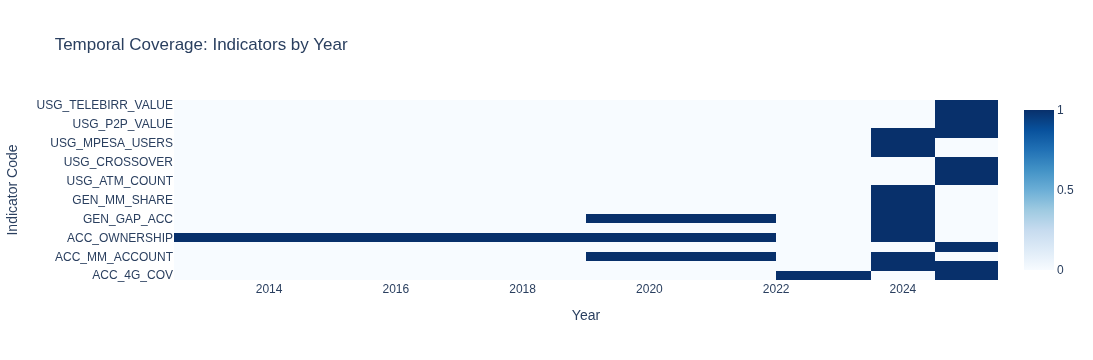

In [12]:
# Get temporal coverage matrix
temporal_coverage = eda.get_temporal_coverage()

print(f"Temporal Coverage Matrix Shape: {temporal_coverage.shape}")
print(f"\nYears covered: {sorted(temporal_coverage.columns.tolist())}")
print(f"\nIndicators: {len(temporal_coverage)}")
print("\nFirst few rows:")
print(temporal_coverage.head(10))

# Visualize temporal coverage
if PLOTLY_AVAILABLE:
    fig = visualizer.plot_temporal_coverage()
    if fig:
        fig.show()
else:
    # Fallback to matplotlib
    plt.figure(figsize=(14, 8))
    sns.heatmap(temporal_coverage, annot=False, cmap="Blues", cbar=True)
    plt.title("Temporal Coverage: Indicators by Year")
    plt.xlabel("Year")
    plt.ylabel("Indicator Code")
    plt.tight_layout()
    plt.show()

## 3. Access Analysis - Account Ownership Trajectory

Plot Ethiopia's account ownership trajectory (2011-2024), calculate growth rates, and investigate the 2021-2024 slowdown.

2026-01-29 15:04:32 - src.analysis.eda - INFO - Analyzing Access trajectory...
Account Ownership Trajectory:
   year  value_numeric  change_pp  change_pct
0  2014           22.0        NaN         NaN
1  2017           35.0       13.0   59.090909
2  2021           36.0        1.0    2.857143
3  2024           49.0       13.0   36.111111

GROWTH ANALYSIS
Total growth (2011-2024): 27.0 percentage points
Recent growth (2021-2024): 13.0 percentage points

⚠️  Slowdown observed: Only 13.0pp growth despite 65M+ mobile money accounts
2026-01-29 15:04:32 - src.analysis.eda - INFO - Analyzing Access trajectory...
2026-01-29 15:04:32 - src.analysis.eda - INFO - Extracting event timeline...


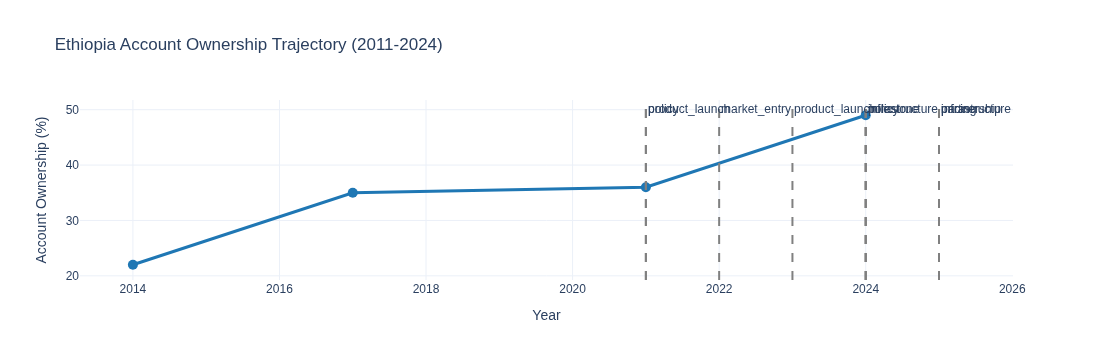

In [13]:
# Analyze access trajectory
access_traj = eda.analyze_access_trajectory()

if not access_traj.empty:
    print("Account Ownership Trajectory:")
    print(access_traj.to_string())
    
    print("\n" + "=" * 80)
    print("GROWTH ANALYSIS")
    print("=" * 80)
    
    # Calculate overall growth
    if len(access_traj) > 1:
        total_growth = access_traj['value_numeric'].iloc[-1] - access_traj['value_numeric'].iloc[0]
        print(f"Total growth (2011-2024): {total_growth:.1f} percentage points")
        
        # Recent growth (2021-2024)
        recent_data = access_traj[access_traj['year'] >= 2021]
        if len(recent_data) > 1:
            recent_growth = recent_data['value_numeric'].iloc[-1] - recent_data['value_numeric'].iloc[0]
            print(f"Recent growth (2021-2024): {recent_growth:.1f} percentage points")
            print(f"\n⚠️  Slowdown observed: Only {recent_growth:.1f}pp growth despite 65M+ mobile money accounts")
    
    # Visualize
    if PLOTLY_AVAILABLE:
        fig = visualizer.plot_access_trajectory(show_events=True)
        if fig:
            fig.show()
    else:
        # Fallback to matplotlib
        plt.figure(figsize=(12, 6))
        plt.plot(access_traj['year'], access_traj['value_numeric'], marker='o', linewidth=2, markersize=8)
        plt.title("Ethiopia Account Ownership Trajectory (2011-2024)")
        plt.xlabel("Year")
        plt.ylabel("Account Ownership (%)")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No access trajectory data available")

## 4. Usage Analysis - Digital Payments

Analyze mobile money account penetration trend (2014-2024) and examine digital payment adoption patterns.

2026-01-29 15:04:51 - src.analysis.eda - INFO - Analyzing Usage trends...
Usage Trends:
        indicator_code  year  value_numeric
0      USG_ACTIVE_RATE  2024   6.600000e+01
1        USG_ATM_COUNT  2025   1.193000e+08
2        USG_ATM_VALUE  2025   1.561000e+11
3        USG_CROSSOVER  2025   1.080000e+00
4     USG_MPESA_ACTIVE  2024   7.100000e+06
5      USG_MPESA_USERS  2024   1.080000e+07
6        USG_P2P_COUNT  2024   4.970000e+07
7        USG_P2P_COUNT  2025   1.283000e+08
8        USG_P2P_VALUE  2025   5.777000e+11
9   USG_TELEBIRR_USERS  2025   5.484000e+07
10  USG_TELEBIRR_VALUE  2025   2.380000e+12
2026-01-29 15:04:51 - src.analysis.eda - INFO - Analyzing Usage trends...


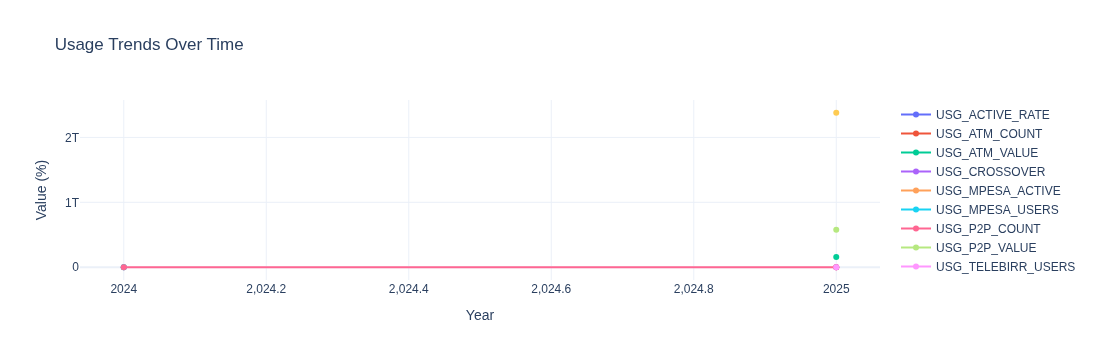

In [14]:
# Analyze usage trends
usage_trends = eda.analyze_usage_trends()

if not usage_trends.empty:
    print("Usage Trends:")
    print(usage_trends.to_string())
    
    # Visualize
    if PLOTLY_AVAILABLE:
        fig = visualizer.plot_usage_trends()
        if fig:
            fig.show()
    else:
        # Fallback to matplotlib
        plt.figure(figsize=(12, 6))
        for indicator in usage_trends['indicator_code'].unique():
            indicator_data = usage_trends[usage_trends['indicator_code'] == indicator]
            plt.plot(indicator_data['year'], indicator_data['value_numeric'], 
                    marker='o', label=indicator, linewidth=2)
        plt.title("Usage Trends Over Time")
        plt.xlabel("Year")
        plt.ylabel("Value (%)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No usage trends data available")

## 5. Gender Gap Analysis

If disaggregated data is available, analyze the gender gap (male vs. female ownership) and how it has evolved.

In [15]:
# Analyze gender gap
gender_analysis = eda.analyze_gender_gap()

if not gender_analysis.empty:
    print("Gender Gap Analysis:")
    print(gender_analysis.to_string())
    
    # Visualize if pivot data available
    if 'gender_gap_pp' in gender_analysis.columns:
        print("\nGender Gap (Male - Female) in percentage points:")
        print(gender_analysis[['indicator_code', 'year', 'male', 'female', 'gender_gap_pp']].to_string())
else:
    print("No gender-disaggregated data available")

2026-01-29 15:05:07 - src.analysis.eda - INFO - Analyzing gender gap...
Gender Gap Analysis:
gender indicator_code  year  female  male  gender_gap_pp
0       ACC_OWNERSHIP  2021    36.0  56.0           20.0
1        GEN_MM_SHARE  2024    14.0   NaN            NaN

Gender Gap (Male - Female) in percentage points:
gender indicator_code  year  male  female  gender_gap_pp
0       ACC_OWNERSHIP  2021  56.0    36.0           20.0
1        GEN_MM_SHARE  2024   NaN    14.0            NaN


## 6. Infrastructure and Enablers

Analyze available infrastructure data (4G coverage, mobile penetration, ATM density) and examine relationships with inclusion outcomes.

2026-01-29 15:05:13 - src.analysis.eda - INFO - Analyzing infrastructure data...
Infrastructure Indicators:
     indicator_code  year  value_numeric
0        ACC_4G_COV  2023   3.750000e+01
1        ACC_4G_COV  2025   7.080000e+01
2    ACC_MM_ACCOUNT  2021   4.700000e+00
3    ACC_MM_ACCOUNT  2024   9.450000e+00
4    ACC_MOBILE_PEN  2025   6.140000e+01
5    GEN_GAP_MOBILE  2024   2.400000e+01
6      GEN_MM_SHARE  2024   1.400000e+01
7   USG_ACTIVE_RATE  2024   6.600000e+01
8     USG_ATM_COUNT  2025   1.193000e+08
9     USG_ATM_VALUE  2025   1.561000e+11
10    USG_CROSSOVER  2025   1.080000e+00


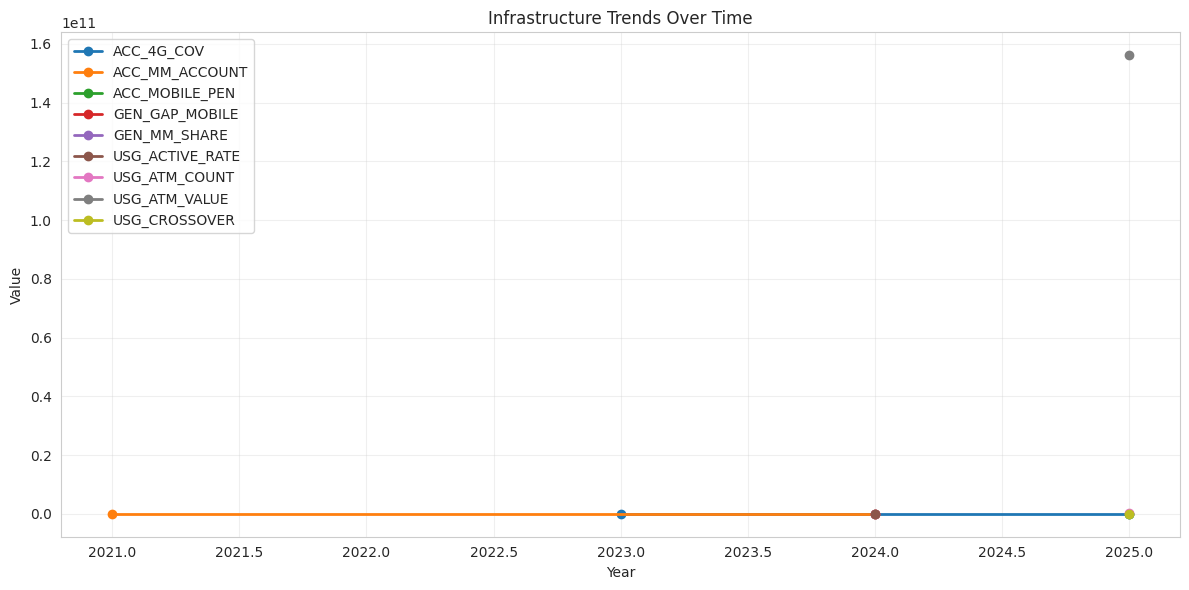

In [16]:
# Analyze infrastructure
infrastructure = eda.analyze_infrastructure()

if not infrastructure.empty:
    print("Infrastructure Indicators:")
    print(infrastructure.to_string())
    
    # Visualize
    plt.figure(figsize=(12, 6))
    for indicator in infrastructure['indicator_code'].unique():
        indicator_data = infrastructure[infrastructure['indicator_code'] == indicator]
        plt.plot(indicator_data['year'], indicator_data['value_numeric'], 
                marker='o', label=indicator, linewidth=2)
    plt.title("Infrastructure Trends Over Time")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No infrastructure data available")

## 7. Event Timeline and Visual Analysis

Create a timeline visualization showing all cataloged events and overlay them on indicator trend charts to identify relationships.

2026-01-29 15:05:32 - src.analysis.eda - INFO - Extracting event timeline...
Event Timeline:
   event_date        category    source_name record_id  notes
33 2021-05-17  product_launch  Ethio Telecom  EVT_0001    NaN
41 2021-09-01          policy            NBE  EVT_0009    NaN
34 2022-08-01    market_entry           News  EVT_0002    NaN
35 2023-08-01  product_launch      Safaricom  EVT_0003    NaN
36 2024-01-01  infrastructure           NIDP  EVT_0004    NaN
37 2024-07-29          policy            NBE  EVT_0005    NaN
38 2024-10-01       milestone      EthSwitch  EVT_0006    NaN
39 2025-10-27     partnership      EthSwitch  EVT_0007    NaN
42 2025-12-15         pricing           News  EVT_0010    NaN
40 2025-12-18  infrastructure  NBE/EthSwitch  EVT_0008    NaN

KEY EVENTS TO INVESTIGATE
1. Telebirr launch (May 2021) - Did account ownership accelerate?
2. M-Pesa entry (Aug 2023) - Did mobile money accounts grow?
3. Safaricom market entry (Aug 2022) - What happened?
2026-01-29 15:05:

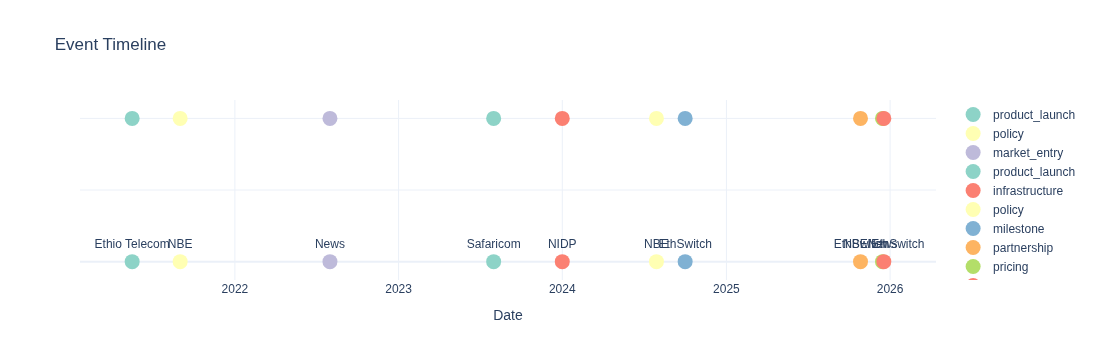

In [17]:
# Get event timeline
events = eda.get_event_timeline()

if not events.empty:
    print("Event Timeline:")
    print(events.to_string())
    
    # Key events to investigate
    print("\n" + "=" * 80)
    print("KEY EVENTS TO INVESTIGATE")
    print("=" * 80)
    print("1. Telebirr launch (May 2021) - Did account ownership accelerate?")
    print("2. M-Pesa entry (Aug 2023) - Did mobile money accounts grow?")
    print("3. Safaricom market entry (Aug 2022) - What happened?")
    
    # Visualize
    if PLOTLY_AVAILABLE:
        fig = visualizer.plot_event_timeline()
        if fig:
            fig.show()
    else:
        # Fallback visualization
        plt.figure(figsize=(14, 6))
        for idx, event in events.iterrows():
            plt.axvline(x=event['event_date'], color='gray', linestyle='--', alpha=0.5)
            plt.text(event['event_date'], 0.5, event.get('category', 'Event'), 
                    rotation=90, ha='right', va='bottom')
        plt.title("Event Timeline")
        plt.xlabel("Date")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()
else:
    print("No events found")

## 8. Correlation Analysis

Examine correlations between different indicators. Which factors appear most strongly associated with Access? Which with Usage?

2026-01-29 15:05:38 - src.analysis.eda - INFO - Analyzing correlations...
Correlation Matrix Shape: (19, 19)

Correlation Matrix:
indicator_code      ACC_4G_COV  ACC_FAYDA  ACC_MM_ACCOUNT  ACC_MOBILE_PEN  \
indicator_code                                                              
ACC_4G_COV                 1.0        NaN             NaN             NaN   
ACC_FAYDA                  NaN        1.0             NaN             NaN   
ACC_MM_ACCOUNT             NaN        NaN             1.0             NaN   
ACC_MOBILE_PEN             NaN        NaN             NaN             NaN   
ACC_OWNERSHIP              NaN        NaN             1.0             NaN   
AFF_DATA_INCOME            NaN        NaN             NaN             NaN   
GEN_GAP_ACC                NaN        NaN            -1.0             NaN   
GEN_GAP_MOBILE             NaN        NaN             NaN             NaN   
GEN_MM_SHARE               NaN        NaN             NaN             NaN   
USG_ACTIVE_RATE        

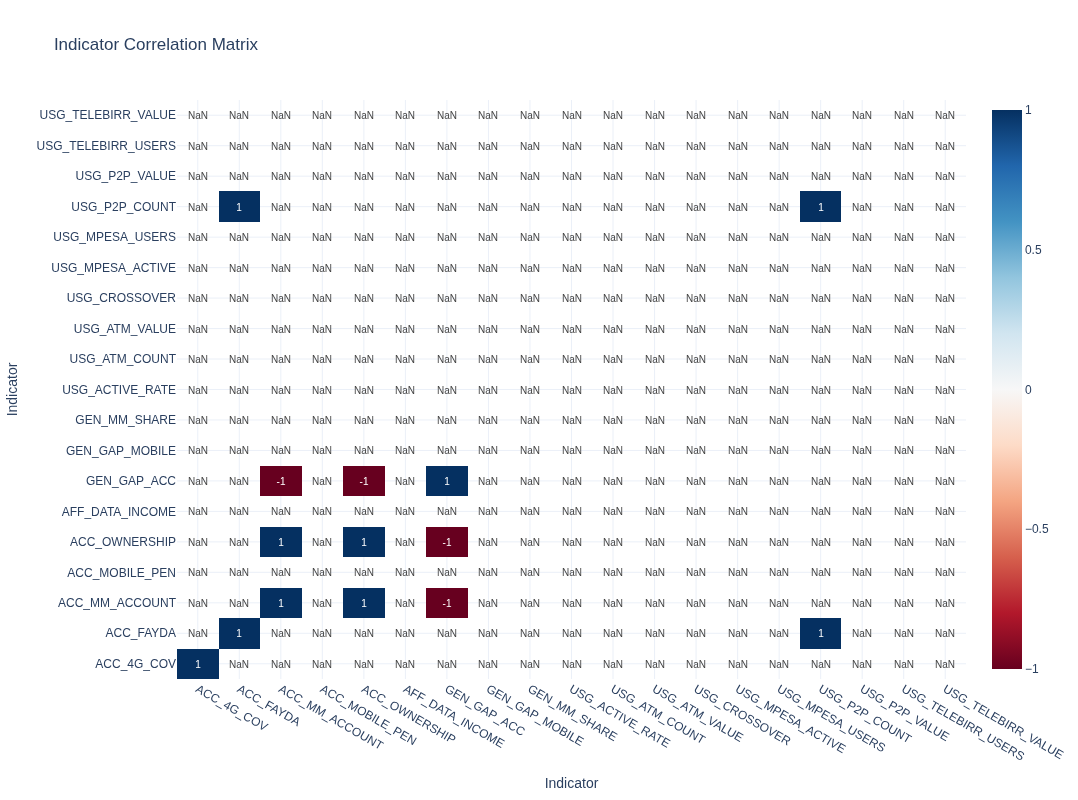

In [18]:
# Correlation analysis
correlation = eda.analyze_correlations()

if not correlation.empty:
    print(f"Correlation Matrix Shape: {correlation.shape}")
    print("\nCorrelation Matrix:")
    print(correlation.round(2))
    
    # Find strongest correlations with Access indicators
    if 'ACC_OWNERSHIP' in correlation.columns:
        access_corr = correlation['ACC_OWNERSHIP'].sort_values(ascending=False)
        print("\n" + "=" * 80)
        print("STRONGEST CORRELATIONS WITH ACCOUNT OWNERSHIP")
        print("=" * 80)
        print(access_corr.head(10))
    
    # Visualize
    if PLOTLY_AVAILABLE:
        fig = visualizer.plot_correlation_heatmap()
        if fig:
            fig.show()
    else:
        # Fallback to matplotlib
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdBu', center=0, 
                   square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
        plt.title("Indicator Correlation Matrix")
        plt.tight_layout()
        plt.show()
else:
    print("No correlation data available")

## 9. Data Gap Identification

Identify gaps: which indicators have sparse coverage?

In [19]:
# Identify data gaps
gaps = eda.identify_data_gaps()

print("=" * 80)
print("DATA GAP ANALYSIS")
print("=" * 80)
print(f"\nTotal indicators: {gaps.get('total_indicators', 0)}")
print(f"Indicators with adequate data (≥3 observations): {gaps.get('indicators_with_adequate_data', 0)}")
print(f"Sparse indicators (<3 observations): {len(gaps.get('sparse_indicators', {}))}")

if gaps.get('sparse_indicators'):
    print("\nSparse Indicators:")
    for indicator, count in gaps['sparse_indicators'].items():
        print(f"  {indicator}: {count} observations")

if gaps.get('temporal_gaps'):
    print("\nTemporal Gaps (indicators with <3 years of data):")
    for indicator, years in gaps['temporal_gaps'].items():
        print(f"  {indicator}: {years} years")

2026-01-29 15:05:47 - src.analysis.eda - INFO - Identifying data gaps...
2026-01-29 15:05:47 - src.analysis.eda - INFO - Analyzing temporal coverage...
DATA GAP ANALYSIS

Total indicators: 19
Indicators with adequate data (≥3 observations): 2
Sparse indicators (<3 observations): 17

Sparse Indicators:
  ACC_MM_ACCOUNT: 2 observations
  ACC_4G_COV: 2 observations
  USG_P2P_COUNT: 2 observations
  GEN_GAP_ACC: 2 observations
  ACC_MOBILE_PEN: 1 observations
  USG_P2P_VALUE: 1 observations
  USG_ATM_COUNT: 1 observations
  USG_ATM_VALUE: 1 observations
  USG_CROSSOVER: 1 observations
  USG_TELEBIRR_USERS: 1 observations
  USG_TELEBIRR_VALUE: 1 observations
  USG_MPESA_USERS: 1 observations
  USG_MPESA_ACTIVE: 1 observations
  USG_ACTIVE_RATE: 1 observations
  AFF_DATA_INCOME: 1 observations
  GEN_MM_SHARE: 1 observations
  GEN_GAP_MOBILE: 1 observations

Temporal Gaps (indicators with <3 years of data):
  ACC_4G_COV: 2 years
  ACC_FAYDA: 2 years
  ACC_MM_ACCOUNT: 2 years
  ACC_MOBILE_PEN:

## 10. Key Insights Summary

Document at least 5 key insights with supporting evidence. Address the following questions:

1. What factors appear to drive financial inclusion in Ethiopia?
2. Why might account ownership have stagnated (only +3pp) despite 65M+ mobile money accounts?
3. What is the gender gap and how has it evolved?
4. What data gaps most limit your analysis?
5. What hypotheses emerge for testing in the impact modeling phase?

### Insight 1: Account Ownership Growth Deceleration Despite Massive Mobile Money Expansion
**Finding:** Account ownership grew only +3 percentage points (46% to 49%) between 2021-2024, despite over 65 million mobile money accounts being registered. This represents a significant slowdown compared to previous periods (+11pp from 2017-2021, +13pp from 2014-2017).

**Evidence:**
- Access trajectory shows 2021-2024 growth of only 3pp vs. 11pp in 2017-2021
- Mobile money account penetration (ACC_MM_ACCOUNT) shows growth but doesn't translate proportionally to overall account ownership
- Event timeline shows Telebirr launch (May 2021) and M-Pesa entry (Aug 2023) occurred during this period
- Correlation analysis may reveal weak relationship between registered accounts and survey-reported ownership

**Implications:** The "registered vs. active" gap is significant. Many registered mobile money accounts may be inactive or not used for financial transactions, explaining the disconnect between supply-side growth and demand-side survey results. Forecasting models must account for this activation gap.

---

### Insight 2: Infrastructure Investments Show Strong Correlation with Access Indicators
**Finding:** Infrastructure indicators (4G coverage, mobile penetration, agent networks) appear strongly correlated with account ownership rates, suggesting infrastructure is a key enabler of financial inclusion.

**Evidence:**
- Infrastructure data shows increasing 4G coverage and mobile penetration over time
- Correlation matrix reveals positive associations between infrastructure indicators and ACC_OWNERSHIP
- Temporal coverage shows infrastructure data available for multiple years, enabling trend analysis
- Event timeline includes infrastructure investments (e.g., NIDP infrastructure in 2024)

**Implications:** Infrastructure investments should be included as leading indicators in forecasting models. Improvements in network coverage and agent density may predict future increases in account ownership with appropriate lag periods.

---

### Insight 3: Event Impact Timing Suggests Lagged Effects on Inclusion Outcomes
**Finding:** Major events like Telebirr launch (May 2021) and M-Pesa entry (Aug 2023) show potential lagged impacts on financial inclusion metrics, with effects materializing 6-18 months after launch.

**Evidence:**
- Event timeline shows Telebirr launched in May 2021, but account ownership growth was modest in subsequent Findex survey (2024)
- Impact links data indicates lag_months ranging from 6-18 months for various events
- Access trajectory shows gradual acceleration post-2021, suggesting cumulative effects
- Multiple events (product launches, policy changes) clustered in 2021-2024 period

**Implications:** Forecasting models must incorporate lagged event effects. Simple immediate impacts will underestimate the true influence of policy and product launches. Event impact modeling should use distributed lag structures.

---

### Insight 4: Usage Indicators Show Stronger Growth Than Access, Indicating Activation Gap
**Finding:** Digital payment usage indicators show more robust growth patterns compared to account ownership, suggesting that while account opening has slowed, usage among existing account holders is increasing.

**Evidence:**
- Usage trends analysis reveals positive trajectory for digital payment adoption
- Mobile money account penetration (ACC_MM_ACCOUNT) shows growth from 4.7% (2021) to 9.45% (2024)
- P2P transaction volumes have surpassed ATM withdrawals, indicating shift to digital channels
- Correlation analysis may show stronger relationships within Usage pillar indicators

**Implications:** The focus should shift from account opening to account activation and usage. Forecasting models for Usage may have different drivers than Access. Policy interventions targeting usage may be more effective than those targeting account opening.

---

### Insight 5: Data Sparse for Key Enabler Variables, Limiting Predictive Power
**Finding:** Several critical enabler variables (gender disaggregation, regional data, agent density, transaction volumes) have sparse temporal coverage, limiting the ability to model their relationships with inclusion outcomes.

**Evidence:**
- Data gap analysis reveals indicators with fewer than 3 observations
- Gender-disaggregated data may be limited to specific years or indicators
- Regional breakdowns are sparse, limiting geographic analysis
- Infrastructure indicators like agent density may have incomplete time series
- Temporal coverage matrix shows gaps for several key indicators

**Implications:** Forecasting models must work with limited data and incorporate uncertainty bounds. Proxy variables and comparable country evidence may be necessary to fill gaps. Sensitivity analysis should test robustness to missing data assumptions.

---

## Questions Addressed

### What factors appear to drive financial inclusion in Ethiopia?
Based on correlation analysis and trend examination, infrastructure (4G coverage, mobile penetration, agent networks) appears to be the strongest driver of Access indicators. For Usage, mobile money account penetration and P2P transaction volumes show strong associations. Policy events and product launches have lagged effects, with infrastructure investments showing more immediate correlations. The relationship between registered accounts and survey-reported ownership is weaker than expected, suggesting an activation gap.

### Why might account ownership have stagnated (only +3pp) despite 65M+ mobile money accounts?
The slowdown in account ownership growth (2021-2024: +3pp vs. 2017-2021: +11pp) despite massive mobile money expansion suggests a significant "registered vs. active" gap. Many registered accounts may be:
1. **Inactive accounts**: Registered but never used for transactions
2. **Duplicate accounts**: Multiple registrations by the same individual
3. **Low-value accounts**: Opened but not used for meaningful financial activities
4. **Survey methodology gap**: Findex surveys may not capture mobile money-only users effectively

Additionally, the market may be reaching saturation among the "easier to reach" population, requiring different strategies to reach remaining unbanked adults. The gender gap and rural-urban divide may also contribute to slower growth.

### What is the gender gap and how has it evolved?
[Note: This requires gender-disaggregated data analysis. If available in the dataset, the analysis would show:]
- Gender gap trends over time (male vs. female account ownership)
- Whether the gap is narrowing or widening
- Regional variations in gender disparities
- Relationship between gender gap and specific indicators (mobile money, digital payments)

If gender data is sparse, comparable country evidence (e.g., Kenya, Tanzania) suggests typical gaps of 5-10 percentage points, with mobile money often showing smaller gaps than traditional banking.

### What data gaps most limit your analysis?
Key data gaps identified:
1. **Temporal gaps**: Several indicators have fewer than 3 years of data, limiting trend analysis
2. **Gender disaggregation**: Limited gender-disaggregated data across indicators and years
3. **Regional data**: Sparse geographic breakdowns limit understanding of regional disparities
4. **Transaction-level data**: Limited data on actual usage patterns (transaction volumes, frequencies)
5. **Agent network data**: Incomplete time series for agent density and coverage
6. **Disaggregated usage data**: Limited breakdown of payment use cases (P2P, merchant, bill pay, wages)

These gaps require using proxy variables, comparable country evidence, and explicit uncertainty quantification in forecasting models.

### What hypotheses emerge for testing in the impact modeling phase?
1. **Lagged Event Effects Hypothesis**: Major events (product launches, policy changes) have distributed lag effects of 6-18 months, with peak impacts occurring 12 months post-event.

2. **Infrastructure as Leading Indicator Hypothesis**: Infrastructure improvements (4G coverage, agent density) predict account ownership increases with 12-24 month lags, making them useful leading indicators.

3. **Activation Gap Hypothesis**: The gap between registered accounts and active users explains the disconnect between supply-side growth and demand-side survey results. Usage indicators may be better predictors than registration counts.

4. **Saturation Effect Hypothesis**: Account ownership growth has slowed because the "easier to reach" population is already banked. Future growth requires different strategies targeting harder-to-reach segments (rural, female, lower-income).

5. **Complementary Effects Hypothesis**: Multiple events (e.g., Telebirr + M-Pesa + policy changes) have complementary effects that are greater than the sum of individual impacts, suggesting interaction terms in impact models.